In [1]:
import os
import numpy as np

root_dir= os.path.abspath("../..")
data_dir = os.path.join(root_dir, 'data')
source_dir = os.path.join(root_dir, 'source')
data_dir=os.path.join(data_dir,'mnist_png/training')


In [5]:
os.path.exists(data_dir)

True

In [2]:
import load_data 
training_data,validation_data, test_data=load_data.load_()

import source_code
act_func=source_code.ReLU
mini_batch_size=50
layers=[source_code.conv((mini_batch_size,1,32,32),(6,1,5,5),activation_func=act_func,flag=1),
        source_code.conv((mini_batch_size,6,14,14),(16,6,5,5),activation_func=act_func,flag=2),
        source_code.FullyConnectedLayer(400,120,activation_func=act_func,flag=1),
        source_code.FullyConnectedLayer(120,84,activation_func=act_func,flag=2),
        source_code.SoftmaxLayer(84,10,activation_func=act_func)
]


In [4]:
name=str(mini_batch_size)+"complete"

In [3]:
import random
random.shuffle(validation_data)

In [7]:
net=source_code.Network(layers,mini_batch_size)
net.SGD(training_data,validation_data[:200],3,0.1,name)

time for 0 epoch 3142.38329506
time for 1 epoch 4151.56305695
time for 2 epoch 3419.01106


In [13]:
net.accuracy(test_data)

0.9559

In [15]:
net.accuracy(validation_data[:200])

0.965

In [12]:
random.shuffle(training_data)
acc=[]
for k in xrange(0,50000,5000):
    acc.append(net.accuracy(training_data[k:k+5000]))
np.mean(acc)

0.95862000000000003

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

def plot_tsne(t1,y_label,i):
    toy,toy_label=array_creator(t1,y_label)
    temp=model.fit_transform(toy,toy_label)
    name="layer"+str(i)+"retesting"
    scatter(temp, np.asarray(toy_label))
    plt.savefig(name, dpi=120)


def array_creator(toy,toy_label):
    test=zip(toy,toy_label)
    random.shuffle(test)
    return seaprator(test)

def seaprator(tups):
    toy=[]
    toy_label=[]
    for i in xrange(N):
        toy.append(tups[i][0])
        toy_label.append(tups[i][1])
    return toy, toy_label

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)


In [18]:
N=1000
net.forwardpass(test_data[:N],N)
t1=net.layers[0].output.reshape((N,14*14*6))
t2=net.layers[1].output.reshape((N,5*5*16))
t3=net.layers[2].output.reshape((N,120))
t4=net.layers[3].output.reshape((N,84))

In [19]:
y_label=[]
for i in xrange(N):
    y_label.append(np.argmax(test_data[i][1]))

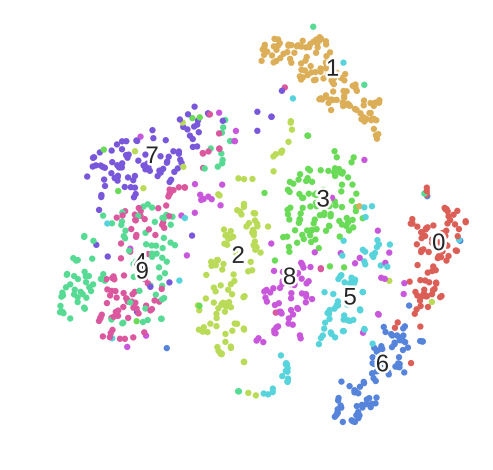

In [21]:
plot_tsne(t1,y_label,1)